In [1]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

In [3]:

# To set your environment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'
bearer_token = os.environ.get("TOKEN")


def create_url():
    # Replace with user ID below
    user_id = 34282316
    return "https://api.twitter.com/2/users/{}/mentions".format(user_id)
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2UserMentionsPython"
    return r





    

In [4]:
def get_params( start, end,year=2021, day="01"):
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    if end == "12":
        day="31"
    query_params = {"max_results":100,
                    "start_time" : f"{year}-{start}-01T00:00:00.000Z",
                    "end_time" : f"{year}-{end}-{day}T00:00:00.000Z",
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
        
                    'next_token': {}}
    return  query_params




def connect_to_endpoint(url, params):
    response = requests.request("GET", url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


In [5]:
url = create_url()

In [6]:
df_meta = pd.DataFrame()
df_data = pd.DataFrame()
df_user = pd.DataFrame()
df_place = pd.DataFrame()
for year in ["2020","2021"]:
    for i in range(1,13):
        if i < 9:
            start = f"0{i}"
            end =  f"0{i+1}"
        elif i == 9:
            start = f"0{i}"
            end =  f"{i+1}"
        elif i < 12:
            start = f"{i}"
            end =  f"{i+1}"
        else:
            start = f"{i}"
            end =  f"{i}"
        
        
        params = get_params(start,end, year = year)
        json_response = connect_to_endpoint(url, params)
        df = pd.json_normalize(json_response)
        if df["meta.result_count"][0] != 0:
            df_meta = pd.concat([df_meta,df])
            df = pd.json_normalize(json_response["data"])
            df_data = pd.concat([df_data,df])
            df = pd.json_normalize(json_response["includes"]["users"])
            df_user = pd.concat([df_user,df])
            try:
                
                df = pd.json_normalize(json_response["includes"]["places"])
                df["date"] = pd.DataFrame({"date": [f"{year} - {start}" for i in range(len(df))]})
                df_place = pd.concat([df_place,df])
            except:
                pass
            


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [7]:
len(df_meta)

8

In [8]:
len(df_data)

621

In [9]:
len(df_user)

407

In [10]:
len(df_place)

8

In [11]:
df_meta

,data,includes.users,meta.oldest_id,meta.newest_id,meta.result_count,errors,includes.places,meta.next_token
0,"[{'id': '1399411647823876103', 'reply_settings...","[{'name': 'JCP in Bristol and Bath', 'username...",1398534691016282112,1399411647823876103,9,NaN,NaN,NaN
0,"[{'id': '1410192675597324288', 'conversation_i...","[{'id': '835056307153551360', 'description': '...",1405480557409079299,1410192675597324288,100,"[{'value': '1080457465039413249', 'detail': 'C...","[{'place_type': 'city', 'geo': {'type': 'Featu...",7140dibdnow9c7btw3z0ry3ooe5s88nrnlc6qyy1mifjt
0,"[{'created_at': '2021-07-31T19:05:08.000Z', 'a...","[{'verified': True, 'created_at': '2012-11-07T...",1414507781802053632,1421547493033193477,100,"[{'parameter': 'in_reply_to_user_id', 'resourc...","[{'full_name': 'Huddersfield, England', 'count...",7140dibdnow9c7btw3z171l6wg36zvm20p8mx2e8toj02
0,"[{'author_id': '1160425779945246721', 'in_repl...","[{'verified': False, 'created_at': '2019-08-11...",1422089986715922435,1432747934773391361,77,NaN,NaN,NaN
0,"[{'in_reply_to_user_id': '34282316', 'conversa...",[{'description': 'Moje poglądy polityczne są o...,1433336199121448964,1443137364327555074,83,NaN,"[{'full_name': 'Nottingham, England', 'country...",NaN
0,"[{'public_metrics': {'retweet_count': 0, 'repl...",[{'description': 'National job vacancies & adv...,1443893766490820644,1454478659511799818,94,NaN,"[{'country': 'Vereinigtes Königreich', 'place_...",NaN
0,"[{'lang': 'en', 'reply_settings': 'everyone', ...","[{'created_at': '2013-12-04T15:05:05.000Z', 'i...",1460592544643964934,1476655746255396870,100,NaN,"[{'place_type': 'city', 'id': '4f854c83732cf4f...",7140dibdnow9c7btw3z3al40a0ry0bn8zjdecosm67ub8
0,"[{'public_metrics': {'retweet_count': 0, 'repl...","[{'description': 'Developer, Trainer, Facilit...",1465987241055072256,1476655746255396870,58,NaN,NaN,NaN


In [12]:
df_data = df_data.drop("referenced_tweets",1).drop_duplicates()

In [13]:
df_data.reset_index(drop=True, inplace=True)

In [14]:
df_data.head()

,id,reply_settings,conversation_id,created_at,source,text,author_id,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,in_reply_to_user_id,geo.place_id
0,1399411647823876103,everyone,1399411647823876103,2021-05-31T17:05:11.000Z,Hootsuite Inc.,How is your body language? \n😊 constant smiler...,931775210,en,0,0,0,0,NaN,NaN
1,1399351296042340356,everyone,1399351296042340356,2021-05-31T13:05:22.000Z,Hootsuite Inc.,Always landing in the 'No' pile? Oh dear.\n\nA...,835065955046809604,en,1,0,1,0,NaN,NaN
2,1399335387567435791,everyone,1399335387567435791,2021-05-31T12:02:09.000Z,Hootsuite Inc.,"Thanks, but no thanks!\n\nSo it is finally tim...",564538442,en,0,0,2,0,NaN,NaN
3,1399320135035412486,everyone,1399320135035412486,2021-05-31T11:01:32.000Z,Hootsuite Inc.,Always landing in the 'No' pile? Oh dear.\n\nA...,1252380788,en,0,0,0,0,NaN,NaN
4,1399259575287754756,everyone,1399259575287754756,2021-05-31T07:00:54.000Z,Hootsuite Inc.,"Thanks, but no thanks!\n\nSo it is finally tim...",828561724429197312,en,0,0,0,0,NaN,NaN


In [80]:
df_data

,id,reply_settings,conversation_id,created_at,source,text,author_id,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,in_reply_to_user_id,geo.place_id
0,1399411647823876103,everyone,1399411647823876103,2021-05-31T17:05:11.000Z,Hootsuite Inc.,How is your body language? \n😊 constant smiler...,931775210,en,0,0,0,0,NaN,NaN
1,1399351296042340356,everyone,1399351296042340356,2021-05-31T13:05:22.000Z,Hootsuite Inc.,Always landing in the 'No' pile? Oh dear.\n\nA...,835065955046809604,en,1,0,1,0,NaN,NaN
2,1399335387567435791,everyone,1399335387567435791,2021-05-31T12:02:09.000Z,Hootsuite Inc.,"Thanks, but no thanks!\n\nSo it is finally tim...",564538442,en,0,0,2,0,NaN,NaN
3,1399320135035412486,everyone,1399320135035412486,2021-05-31T11:01:32.000Z,Hootsuite Inc.,Always landing in the 'No' pile? Oh dear.\n\nA...,1252380788,en,0,0,0,0,NaN,NaN
4,1399259575287754756,everyone,1399259575287754756,2021-05-31T07:00:54.000Z,Hootsuite Inc.,"Thanks, but no thanks!\n\nSo it is finally tim...",828561724429197312,en,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,1460609577951666180,everyone,1460609577951666180,2021-11-16T14:03:54.000Z,Hootsuite Inc.,Always landing in the 'No' pile? Are you doing...,564538442,en,0,0,0,0,NaN,NaN
559,1460600154483048451,everyone,1460592544643964934,2021-11-16T13:26:28.000Z,Twitter for iPhone,@LinnetMac @ianbirrell @TotaljobsUK @indeed Sh...,159454866,en,0,0,4,0,514763377,NaN
560,1460594179617312772,everyone,1460592544643964934,2021-11-16T13:02:43.000Z,Twitter Web App,@oldflatcap @TotaljobsUK @indeed Argh...,514763377,en,0,0,1,0,1304154437523570706,NaN
561,1460593785222701058,everyone,1460592544643964934,2021-11-16T13:01:09.000Z,Twitter for Android,@LinnetMac @TotaljobsUK @indeed We know the fe...,1304154437523570706,en,0,1,0,0,514763377,NaN


In [15]:
df_user = df_user.drop_duplicates()

In [16]:
df_user.reset_index(drop=True, inplace=True)

In [17]:
df_user.head()

,name,username,created_at,id,description,verified,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count
0,JCP in Bristol and Bath,JCPinBRS_Bath,2012-11-07T10:51:31.000Z,931775210,"Sharing jobs, events, job search and careers a...",True,2657,658,34962,49
1,JCP in Wiltshire,JCPinWiltshire,2017-02-24T09:56:53.000Z,835065955046809604,"Sharing jobs, events, job search and careers a...",True,1475,965,30384,17
2,JCP Jobs Plus More,JCPJobsPlusMore,2012-04-27T12:01:15.000Z,564538442,National job vacancies & advice to help jobsee...,True,28500,462,42897,287
3,JCP in West Wales,JCPinWestWales,2013-03-08T18:04:28.000Z,1252380788,"Sharing jobs, events, job search and careers a...",True,2291,576,37871,23
4,JCP in NTW,JCPinNTW,2017-02-06T11:11:23.000Z,828561724429197312,"Sharing jobs, events, jobsearch and careers ad...",True,3801,286,39086,25


In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            563 non-null    object
 1   reply_settings                563 non-null    object
 2   conversation_id               563 non-null    object
 3   created_at                    563 non-null    object
 4   source                        563 non-null    object
 5   text                          563 non-null    object
 6   author_id                     563 non-null    object
 7   lang                          563 non-null    object
 8   public_metrics.retweet_count  563 non-null    int64 
 9   public_metrics.reply_count    563 non-null    int64 
 10  public_metrics.like_count     563 non-null    int64 
 11  public_metrics.quote_count    563 non-null    int64 
 12  in_reply_to_user_id           133 non-null    object
 13  geo.place_id        

In [18]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   name                            236 non-null    object
 1   username                        236 non-null    object
 2   created_at                      236 non-null    object
 3   id                              236 non-null    object
 4   description                     236 non-null    object
 5   verified                        236 non-null    bool  
 6   public_metrics.followers_count  236 non-null    int64 
 7   public_metrics.following_count  236 non-null    int64 
 8   public_metrics.tweet_count      236 non-null    int64 
 9   public_metrics.listed_count     236 non-null    int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 16.9+ KB


In [20]:
df = pd.merge(df_data, df_user, left_on="author_id",right_on="id", how = "left")
df.head()

,id_x,reply_settings,conversation_id,created_at_x,source,text,author_id,lang,public_metrics.retweet_count,public_metrics.reply_count,...,name,username,created_at_y,id_y,description,verified,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count
0,1399411647823876103,everyone,1399411647823876103,2021-05-31T17:05:11.000Z,Hootsuite Inc.,How is your body language? \n😊 constant smiler...,931775210,en,0,0,...,JCP in Bristol and Bath,JCPinBRS_Bath,2012-11-07T10:51:31.000Z,931775210,"Sharing jobs, events, job search and careers a...",True,2657,658,34962,49
1,1399351296042340356,everyone,1399351296042340356,2021-05-31T13:05:22.000Z,Hootsuite Inc.,Always landing in the 'No' pile? Oh dear.\n\nA...,835065955046809604,en,1,0,...,JCP in Wiltshire,JCPinWiltshire,2017-02-24T09:56:53.000Z,835065955046809604,"Sharing jobs, events, job search and careers a...",True,1475,965,30384,17
2,1399335387567435791,everyone,1399335387567435791,2021-05-31T12:02:09.000Z,Hootsuite Inc.,"Thanks, but no thanks!\n\nSo it is finally tim...",564538442,en,0,0,...,JCP Jobs Plus More,JCPJobsPlusMore,2012-04-27T12:01:15.000Z,564538442,National job vacancies & advice to help jobsee...,True,28500,462,42897,287
3,1399320135035412486,everyone,1399320135035412486,2021-05-31T11:01:32.000Z,Hootsuite Inc.,Always landing in the 'No' pile? Oh dear.\n\nA...,1252380788,en,0,0,...,JCP in West Wales,JCPinWestWales,2013-03-08T18:04:28.000Z,1252380788,"Sharing jobs, events, job search and careers a...",True,2291,576,37871,23
4,1399259575287754756,everyone,1399259575287754756,2021-05-31T07:00:54.000Z,Hootsuite Inc.,"Thanks, but no thanks!\n\nSo it is finally tim...",828561724429197312,en,0,0,...,JCP in NTW,JCPinNTW,2017-02-06T11:11:23.000Z,828561724429197312,"Sharing jobs, events, jobsearch and careers ad...",True,3801,286,39086,25


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 562
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_x                            563 non-null    object
 1   reply_settings                  563 non-null    object
 2   conversation_id                 563 non-null    object
 3   created_at_x                    563 non-null    object
 4   source                          563 non-null    object
 5   text                            563 non-null    object
 6   author_id                       563 non-null    object
 7   lang                            563 non-null    object
 8   public_metrics.retweet_count    563 non-null    int64 
 9   public_metrics.reply_count      563 non-null    int64 
 10  public_metrics.like_count       563 non-null    int64 
 11  public_metrics.quote_count      563 non-null    int64 
 12  in_reply_to_user_id             133 non-null    ob

In [22]:
d = {}
for i in df.columns:
    if "public_metric" in i:
        v = i.split(".")[1]
        d[i] = v
d

{'public_metrics.retweet_count': 'retweet_count',
 'public_metrics.reply_count': 'reply_count',
 'public_metrics.like_count': 'like_count',
 'public_metrics.quote_count': 'quote_count',
 'public_metrics.followers_count': 'followers_count',
 'public_metrics.following_count': 'following_count',
 'public_metrics.tweet_count': 'tweet_count',
 'public_metrics.listed_count': 'listed_count'}

In [23]:
df = df.rename(columns=d)

In [24]:
df["length"] = df.text.apply(lambda x: len(x))

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [37]:
def model(string):
    scores = sid.polarity_scores(string)
    if scores['compound'] <-0.05:
        return 'neg'
    elif scores['compound'] > 0.05:
        return 'pos'
    else:
        return 'neu'

In [40]:
df["sent"] = df.text.apply(lambda x: model(x))

In [41]:
df["date"] = pd.to_datetime(df.created_at_x)

In [42]:
df["day"] = df.date.dt.day

In [43]:
df["month"] = df.date.dt.month

In [44]:
df["year"] = df.date.dt.year

In [45]:
df["dayofweek"] = df.date.dt.dayofweek

In [46]:
df["weekorend"] = df.dayofweek.apply(lambda x: "weekend" if x in [5,6] else "week")

In [47]:
df["has"] = df.text.apply(lambda x: x.count("#"))

In [48]:
df["men"] = df.text.apply(lambda x: x.count("@"))

In [49]:
df.head()

,id_x,reply_settings,conversation_id,created_at_x,source,text,author_id,lang,retweet_count,reply_count,...,length,sent,date,day,month,year,dayofweek,weekorend,has,men
0,1399411647823876103,everyone,1399411647823876103,2021-05-31T17:05:11.000Z,Hootsuite Inc.,How is your body language? \n😊 constant smiler...,931775210,en,0,0,...,299,pos,2021-05-31 17:05:11+00:00,31,5,2021,0,week,1,1
1,1399351296042340356,everyone,1399351296042340356,2021-05-31T13:05:22.000Z,Hootsuite Inc.,Always landing in the 'No' pile? Oh dear.\n\nA...,835065955046809604,en,1,0,...,300,pos,2021-05-31 13:05:22+00:00,31,5,2021,0,week,1,1
2,1399335387567435791,everyone,1399335387567435791,2021-05-31T12:02:09.000Z,Hootsuite Inc.,"Thanks, but no thanks!\n\nSo it is finally tim...",564538442,en,0,0,...,293,neg,2021-05-31 12:02:09+00:00,31,5,2021,0,week,1,1
3,1399320135035412486,everyone,1399320135035412486,2021-05-31T11:01:32.000Z,Hootsuite Inc.,Always landing in the 'No' pile? Oh dear.\n\nA...,1252380788,en,0,0,...,300,pos,2021-05-31 11:01:32+00:00,31,5,2021,0,week,1,1
4,1399259575287754756,everyone,1399259575287754756,2021-05-31T07:00:54.000Z,Hootsuite Inc.,"Thanks, but no thanks!\n\nSo it is finally tim...",828561724429197312,en,0,0,...,293,neg,2021-05-31 07:00:54+00:00,31,5,2021,0,week,1,1


In [50]:
df.sort_values(by = "like_count", ascending=False)\
.head(10)[["name","verified","text","like_count","retweet_count","followers_count","tweet_count","sent","length","weekorend","has","men"]]


,name,verified,text,like_count,retweet_count,followers_count,tweet_count,sent,length,weekorend,has,men
355,Dr. Dípò Awójídé,True,Best job boards/employment websites/platforms ...,222,147,913150,104419,pos,272,week,0,7
562,LinnetMac,False,Frustrating morning trying to place ads to rec...,10,4,851,2757,neg,278,week,2,2
144,Paul McGrail,False,Exciting job opportunity to join a very succes...,8,6,543,4371,pos,235,week,0,5
304,Ev Lenz,False,"I'm looking for a new job, and have signed up ...",7,0,3431,77198,pos,199,week,0,1
120,Thera East Anglia,False,Amazing #leadership and #management job opport...,6,4,589,2710,pos,212,week,7,6
294,Neil Carberry,False,Good to join the management team @RECmembers p...,6,0,3693,23067,pos,206,week,0,3
276,Paul McGrail,False,Due to an significant increase in apprenticesh...,5,6,543,4371,pos,228,week,0,4
143,Paul McGrail,False,Exciting job opportunity to join a very succes...,5,5,543,4371,pos,238,week,0,6
452,The NORAs,False,Our NORA Finalists for Best Generalist Job Boa...,5,3,2340,2535,pos,156,week,1,6
559,steve richards,False,@LinnetMac @ianbirrell @TotaljobsUK @indeed Sh...,4,0,57620,15395,neu,54,week,0,4


In [51]:
for i,j in  enumerate(df.sort_values(by = "like_count", ascending=False).text):
    print("=====================")
    print(j)
    if i == 5:
        break

Best job boards/employment websites/platforms if you are looking for a job in the UK:

•High Impact Careers (@ImpactCareersUK)
•Total Jobs (@TotaljobsUK)
•Indeed (@IndeedUK)
•CV Library (@CVLibrary)
•Reed (@reedcouk)
•Monster Jobs (@Monsterjobs_uk)
•LinkedIn (@LinkedInUK)
Frustrating morning trying to place ads to recruit new support workers. Neither @TotaljobsUK nor @indeed accept listing unless you are a registered company. One more hurdle for the beleaguered carer (me)...While I am inclined to swear I am reduced to begging... #socialcare #PHB
Exciting job opportunity to join a very successful and growing team as a Construction Plant, land-based engineering lecturer: https://t.co/7veM0WylT9 @IndeedUK @TotaljobsUK @FEJobs @My_Apprentice @MyerscoughColl https://t.co/A7ESIFWUfr
I'm looking for a new job, and have signed up for alerts from @TotaljobsUK - and I keep regular extra emails entitled "You could do different types of jobs"

Condescending - and it gets on my nerves.
Amazing #lea

In [52]:
df.drop_duplicates(subset=["author_id"]).sort_values(by = "followers_count", ascending=False)\
.head(10)[["name","verified","text","followers_count","tweet_count","like_count","retweet_count","sent","length","weekorend","has","men"]]


,name,verified,text,followers_count,tweet_count,like_count,retweet_count,sent,length,weekorend,has,men
355,Dr. Dípò Awójídé,True,Best job boards/employment websites/platforms ...,913150,104419,222,147,pos,272,week,0,7
559,steve richards,False,@LinnetMac @ianbirrell @TotaljobsUK @indeed Sh...,57620,15395,4,0,neu,54,week,0,4
224,Recruiter Magazine,False,This week's #recruitment #CONTRACTS https://t...,38844,42515,2,2,neu,113,week,2,4
154,FE News - The #FutureofEducation News Channel,False,Hiring on the up as Covid-19 restrictions end:...,30632,106914,0,1,neu,298,week,0,1
2,JCP Jobs Plus More,True,"Thanks, but no thanks!\n\nSo it is finally tim...",28500,42897,2,0,neg,293,week,1,1
415,LogisticsIT Magazine,False,Totaljobs data: Logistics sees strong proporti...,19207,7986,1,0,pos,157,week,3,1
50,JCP in Airports,True,😩 Had enough? \n😡 Want to quit your job? \n✋🏼 ...,18187,88278,0,0,neg,290,week,2,1
19,JCP in South London,True,Got a #VideoInterview coming up?\n\nDo not pan...,14135,54162,0,0,pos,281,weekend,2,1
43,The Work Foundation,False,Work Foundation Director @BRHarrison_ was inte...,11686,14367,3,2,pos,240,week,0,3
428,WE ARE UMi,False,According to new research conducted by @Totalj...,11603,26091,1,0,neu,197,week,5,1


In [53]:
df = pd.concat([df, pd.get_dummies(df[["sent","weekorend"]])],1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 562
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id_x                 563 non-null    object             
 1   reply_settings       563 non-null    object             
 2   conversation_id      563 non-null    object             
 3   created_at_x         563 non-null    object             
 4   source               563 non-null    object             
 5   text                 563 non-null    object             
 6   author_id            563 non-null    object             
 7   lang                 563 non-null    object             
 8   retweet_count        563 non-null    int64              
 9   reply_count          563 non-null    int64              
 10  like_count           563 non-null    int64              
 11  quote_count          563 non-null    int64              
 12  in_reply_to_user_id  1

In [55]:
df_temp = df.groupby("author_id" ).\
agg({"like_count":"sum","retweet_count":"sum","length":"mean","has":"sum","men":"sum", 
     "conversation_id":"count", "sent_neg":"sum","sent_neu":"sum","sent_pos":"sum",
     "weekorend_week":"sum","weekorend_weekend":"sum"}).reset_index()

df_temp

,author_id,like_count,retweet_count,length,has,men,conversation_id,sent_neg,sent_neu,sent_pos,weekorend_week,weekorend_weekend
0,1002500168,0,0,72.000000,0,1,1,0,1,0,1,0
1,1003928143705595905,1,0,256.000000,6,20,2,0,0,2,2,0
2,1034484926727561216,1,0,302.000000,0,7,1,0,0,1,1,0
3,1061652925,4,3,283.454545,26,11,11,2,2,7,8,3
4,1085823201538703360,0,0,163.000000,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
213,956893973913759744,0,0,290.000000,3,2,2,0,0,2,2,0
214,958720009609662465,2,3,144.000000,0,5,5,0,5,0,5,0
215,968483398892343297,0,1,279.000000,0,3,3,0,0,3,2,1
216,980660665,0,0,163.000000,2,2,2,0,2,0,2,0


In [56]:
df_temp = df.groupby("author_id" ).\
agg({"like_count":"sum","retweet_count":"sum","length":"mean","has":"sum","men":"sum", 
     "conversation_id":"count", "sent_neg":"sum","sent_neu":"sum","sent_pos":"sum",
     "weekorend_week":"sum","weekorend_weekend":"sum"}).reset_index()

df_temp = pd.merge(df_temp, df[["author_id","name","verified","followers_count","tweet_count"]], left_on="author_id",right_on="author_id", how = "left")
df_temp.drop_duplicates(inplace=True)

df_temp.sort_values(by = "followers_count", ascending=False)\
.head(10)[["name","verified","followers_count","tweet_count","like_count","retweet_count",
           "length","has","men","conversation_id", "sent_neg", "sent_neu","sent_pos", "weekorend_week", "weekorend_weekend"]]


,name,verified,followers_count,tweet_count,like_count,retweet_count,length,has,men,conversation_id,sent_neg,sent_neu,sent_pos,weekorend_week,weekorend_weekend
148,Dr. Dípò Awójídé,True,913150,104419,222,147,272.000000,0,7,1,0,0,1,1,0
153,steve richards,False,57620,15395,4,0,54.000000,0,4,1,0,1,0,1,0
186,Recruiter Magazine,False,38844,42515,2,2,113.000000,2,4,1,0,1,0,1,0
165,FE News - The #FutureofEducation News Channel,False,30632,106914,2,4,300.333333,0,3,3,0,1,2,3,0
427,JCP Jobs Plus More,True,28500,42897,25,11,267.172414,54,29,29,4,7,18,22,7
491,LogisticsIT Magazine,False,19207,7986,1,0,157.000000,3,1,1,0,0,1,1,0
278,JCP in Airports,True,18187,88278,4,1,281.300000,14,10,10,2,1,7,7,3
418,JCP in South London,True,14135,54162,2,0,276.125000,13,8,8,0,1,7,5,3
512,The Work Foundation,False,11686,14367,8,4,243.500000,0,8,4,0,0,4,4,0
329,WE ARE UMi,False,11603,26091,1,0,197.000000,5,1,1,0,1,0,1,0


In [57]:
df.length.describe().to_frame()

,length
count,563.000000
mean,230.968028
std,78.560780
min,24.000000
25%,178.000000
50%,273.000000
75%,296.000000
max,375.000000


In [58]:
import seaborn as sns

In [59]:
#df

<AxesSubplot:xlabel='weekorend', ylabel='length'>

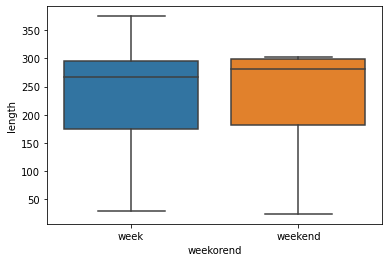

In [60]:
sns.boxplot(data=df, x= "weekorend" ,y = "length")

<AxesSubplot:xlabel='sent', ylabel='length'>

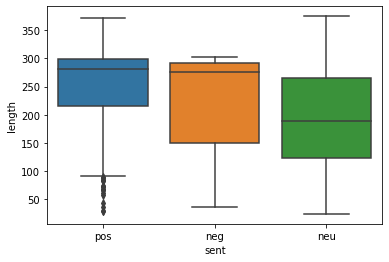

In [61]:
sns.boxplot(data=df, x= "sent" ,y = "length")

In [52]:
df.columns

Index(['lang', 'created_at_x', 'id_x', 'text', 'author_id', 'source',
       'reply_settings', 'conversation_id', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'in_reply_to_user_id', 'geo.place_id',
       'description', 'name', 'id_y', 'created_at_y', 'username', 'verified',
       'followers_count', 'following_count', 'tweet_count', 'listed_count',
       'length', 'sent', 'date', 'day', 'month', 'year', 'dayofweek',
       'weekorend', 'has', 'men', 'sent_neg', 'sent_neu', 'sent_pos',
       'weekorend_week', 'weekorend_weekend'],
      dtype='object')

In [62]:
df["date_day"]= df.apply(lambda x: datetime.datetime(x.year,x.month,x.day),1)

<AxesSubplot:xlabel='month'>

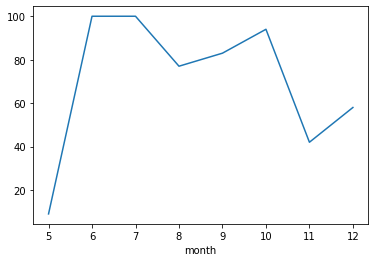

In [63]:
df[df.year==2021].groupby("month").count()["conversation_id"].plot()

<AxesSubplot:xlabel='day'>

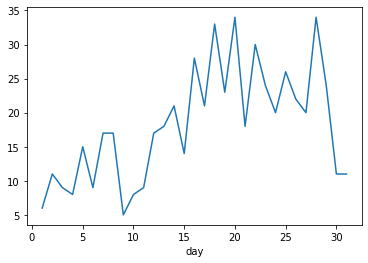

In [64]:
df[df.year==2021].groupby("day").count()["conversation_id"].plot()

<AxesSubplot:xlabel='dayofweek'>

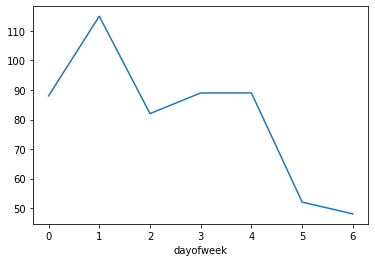

In [65]:
df[df.year==2021].groupby("dayofweek").count()["conversation_id"].plot()


<AxesSubplot:xlabel='date_day'>

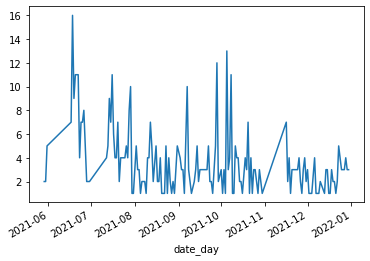

In [66]:
df.groupby("date_day").count()["conversation_id"].plot()

<AxesSubplot:xlabel='sent'>

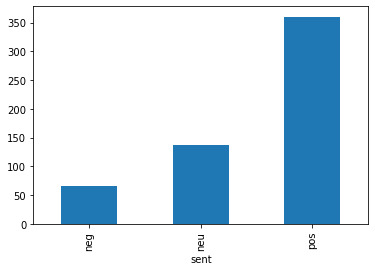

In [67]:
df.groupby("sent").count()["conversation_id"].plot.bar()

In [68]:
df["hour"] = df.date.dt.hour

<AxesSubplot:xlabel='hour'>

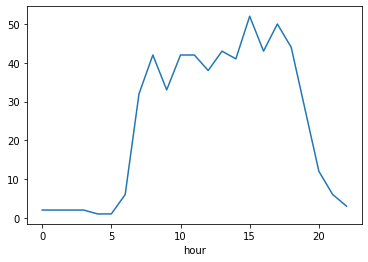

In [69]:
df.groupby("hour").count()["conversation_id"].plot()

In [70]:
import matplotlib.pyplot as plt

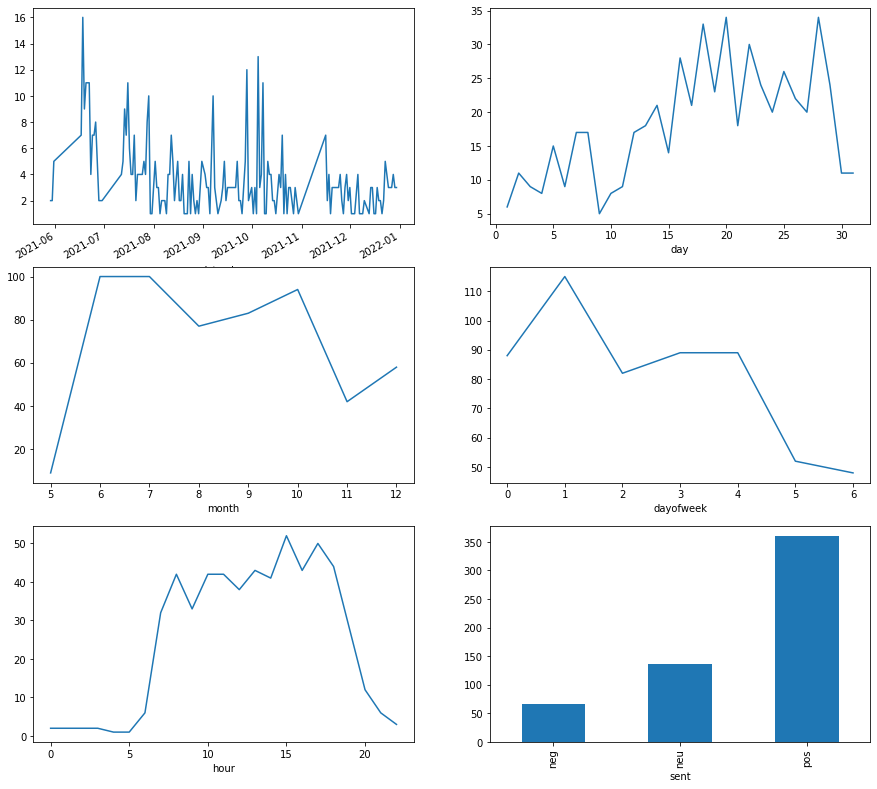

In [71]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

df[df.year==2021].groupby("date_day").count()["conversation_id"].plot(ax=ax[0,0])
df[df.year==2021].groupby("day").count()["conversation_id"].plot(ax=ax[0,1])
df[df.year==2021].groupby("month").count()["conversation_id"].plot(ax=ax[1,0])
df[df.year==2021].groupby("dayofweek").count()["conversation_id"].plot(ax=ax[1,1])
df[df.year==2021].groupby("hour").count()["conversation_id"].plot(ax=ax[2,0])
df[df.year==2021].groupby("sent").count()["conversation_id"].plot.bar()

plt.savefig("time_step")

In [72]:
df_temp = df[["date_day","conversation_id"]].groupby("date_day").count()
df_temp["30days"]= df_temp.rolling(7).mean()
df_temp.dropna()[df_temp.dropna().apply(lambda x: (x.conversation_id - x["30days"]) / x["30days"], 1) > 1]

,conversation_id,30days
date_day,,
2021-08-12,7,3.142857
2021-08-31,5,2.285714
2021-09-07,10,3.857143
2021-09-28,12,4.285714
2021-10-05,13,5.000000
2021-10-08,11,5.142857
2021-10-20,7,3.285714
2021-11-16,7,2.714286
2021-12-23,5,2.285714


In [73]:
df[df.text.apply(lambda x: all([True if "@" in i else False for i in x.split() ]))]

,id_x,reply_settings,conversation_id,created_at_x,source,text,author_id,lang,retweet_count,reply_count,...,weekorend,has,men,sent_neg,sent_neu,sent_pos,weekorend_week,weekorend_weekend,date_day,hour
95,1405881921826168838,everyone,1405881921826168838,2021-06-18T13:35:44.000Z,Twitter for iPhone,@IocaIplastic @IndeedUK @TotaljobsUK,1403133840579780617,und,0,0,...,week,0,3,0,1,0,1,0,2021-06-18,13
223,1430332166806835211,everyone,1430329325321170946,2021-08-25T00:52:17.000Z,Twitter Web App,@azra_lifts @FitnessMagazine @POPSUGARFitness ...,1305913698939174913,und,0,0,...,week,0,14,0,1,0,1,0,2021-08-25,0
334,1437801416941350920,everyone,1435188306698964997,2021-09-14T15:32:25.000Z,Twitter for Android,@OgbeniDipo @ImpactCareersUK @TotaljobsUK @Ind...,3312001497,und,0,0,...,week,0,9,0,1,0,1,0,2021-09-14,15
342,1436232053515866112,everyone,1435188306698964997,2021-09-10T07:36:20.000Z,Twitter for Android,@OgbeniDipo @ImpactCareersUK @TotaljobsUK @Ind...,4873516083,und,0,0,...,week,0,10,0,1,0,1,0,2021-09-10,7
348,1435316738548281347,everyone,1435188306698964997,2021-09-07T18:59:12.000Z,Twitter for Android,@OgbeniDipo @ImpactCareersUK @TotaljobsUK @Ind...,172232422,und,0,0,...,week,0,9,0,1,0,1,0,2021-09-07,18
349,1435270774642851847,everyone,1435188306698964997,2021-09-07T15:56:33.000Z,Twitter for Android,@OgbeniDipo @ImpactCareersUK @TotaljobsUK @Ind...,449961803,und,0,0,...,week,0,9,0,1,0,1,0,2021-09-07,15
356,1435170411982073858,everyone,1434804027901063168,2021-09-07T09:17:45.000Z,Twitter for iPhone,@indeed @TotaljobsUK @uk_sport @KentSport1 @NK...,869695748,und,0,0,...,week,0,8,0,1,0,1,0,2021-09-07,9
362,1433781012681707546,everyone,1433779612794998803,2021-09-03T13:16:46.000Z,Twitter Web App,@CloreLeadership\n@GJ_Arts\n@artsjobs\n@an_job...,484808256,und,0,1,...,week,0,16,0,1,0,1,0,2021-09-03,13
368,1433336199121448964,everyone,1433335753078149122,2021-09-02T07:49:14.000Z,Twitter for iPhone,@_EverydayActive @KentSport1 @uk_sport @Sport_...,869695748,und,0,0,...,week,0,9,0,1,0,1,0,2021-09-02,7


<AxesSubplot:xlabel='date_day'>

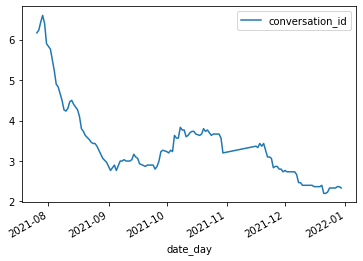

In [79]:
df[["date_day","conversation_id"]].groupby("date_day").count().rolling(30).mean().plot()


In [84]:
df.columns

Index(['id_x', 'reply_settings', 'conversation_id', 'created_at_x', 'source',
       'text', 'author_id', 'lang', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'in_reply_to_user_id', 'geo.place_id',
       'name', 'username', 'created_at_y', 'id_y', 'description', 'verified',
       'followers_count', 'following_count', 'tweet_count', 'listed_count',
       'length', 'sent', 'date', 'day', 'month', 'year', 'dayofweek',
       'weekorend', 'has', 'men', 'sent_neg', 'sent_neu', 'sent_pos',
       'weekorend_week', 'weekorend_weekend', 'date_day', 'hour'],
      dtype='object')

In [90]:
from scipy.stats import pearsonr
import numpy as np

In [92]:
df_temp = df.groupby("author_id").agg({'retweet_count':'sum', 'reply_count':'sum', 'like_count':'sum', 'quote_count':'sum',
                          'followers_count':'mean', 'following_count':'mean', 'tweet_count':'mean','length':'mean',
                            'has':'sum', 'men':'sum', 'sent_neg':'sum', 'sent_neu':'sum', 'sent_pos':'sum',
                            'weekorend_week':'mean', 'weekorend_weekend':'mean'})

rho = df_temp.corr()
pval = df_temp.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,retweet_count,reply_count,like_count,quote_count,followers_count,following_count,tweet_count,length,has,men,sent_neg,sent_neu,sent_pos,weekorend_week,weekorend_weekend
retweet_count,1.0***,0.66***,0.98***,0.5***,0.97***,0.05,0.19***,0.1,0.1,0.14**,0.0,0.04,0.12*,0.03,-0.03
reply_count,0.66***,1.0***,0.71***,0.38***,0.68***,0.13*,0.23***,-0.03,-0.1,0.14**,-0.03,-0.06,-0.02,0.02,-0.02
like_count,0.98***,0.71***,1.0***,0.51***,0.99***,0.05,0.2***,0.08,0.03,0.11*,0.01,0.02,0.06,0.04,-0.04
quote_count,0.5***,0.38***,0.51***,1.0***,0.47***,0.13**,0.14**,0.15**,0.28***,0.22***,0.11*,0.31***,0.25***,0.07,-0.07
followers_count,0.97***,0.68***,0.99***,0.47***,1.0***,0.08,0.21***,0.07,-0.01,0.05,-0.02,-0.02,0.01,0.03,-0.03
following_count,0.05,0.13*,0.05,0.13**,0.08,1.0***,0.34***,0.01,-0.14**,0.02,-0.08,-0.09,-0.08,0.08,-0.08
tweet_count,0.19***,0.23***,0.2***,0.14**,0.21***,0.34***,1.0***,0.13*,0.19***,0.13*,0.05,0.12*,0.26***,0.0,-0.0
length,0.1,-0.03,0.08,0.15**,0.07,0.01,0.13*,1.0***,0.34***,0.22***,0.06,0.02,0.36***,0.09,-0.09
has,0.1,-0.1,0.03,0.28***,-0.01,-0.14**,0.19***,0.34***,1.0***,0.52***,0.46***,0.59***,0.87***,-0.1,0.1
men,0.14**,0.14**,0.11*,0.22***,0.05,0.02,0.13*,0.22***,0.52***,1.0***,0.21***,0.44***,0.59***,0.04,-0.04


In [81]:
df.corr()

,retweet_count,reply_count,like_count,quote_count,verified,followers_count,following_count,tweet_count,listed_count,length,...,year,dayofweek,has,men,sent_neg,sent_neu,sent_pos,weekorend_week,weekorend_weekend,hour
retweet_count,1.000000,0.758551,0.994068,0.491253,0.034753,0.976876,0.044616,0.100791,0.260812,0.034680,...,NaN,-0.038468,-0.032711,0.118049,-0.022822,-0.029312,0.041485,0.027339,-0.027339,-0.037435
reply_count,0.758551,1.000000,0.786003,0.460735,-0.154591,0.739940,0.121444,0.094529,0.265912,-0.093371,...,NaN,-0.083578,-0.109647,0.183057,-0.013923,-0.032625,0.038483,0.026984,-0.026984,-0.076733
like_count,0.994068,0.786003,1.000000,0.492748,0.013681,0.978549,0.045924,0.100942,0.274569,0.018177,...,NaN,-0.044157,-0.051367,0.124311,-0.017869,-0.028744,0.037658,0.028445,-0.028445,-0.043284
quote_count,0.491253,0.460735,0.492748,1.000000,-0.028427,0.490036,0.109749,0.052792,0.186775,0.075342,...,NaN,-0.074487,0.053768,0.071963,-0.016798,-0.027962,0.036242,0.062308,-0.062308,-0.062087
verified,0.034753,-0.154591,0.013681,-0.028427,1.000000,0.095110,-0.287857,0.418618,0.202900,0.561514,...,NaN,0.096819,0.403290,-0.423879,-0.115835,-0.072048,0.141991,-0.162614,0.162614,0.136196
followers_count,0.976876,0.739940,0.978549,0.490036,0.095110,1.000000,0.071245,0.174005,0.388871,0.060536,...,NaN,-0.039630,-0.021460,0.084409,-0.024302,-0.023973,0.037705,0.010281,-0.010281,-0.038897
following_count,0.044616,0.121444,0.045924,0.109749,-0.287857,0.071245,1.000000,0.275491,0.273296,-0.022768,...,NaN,-0.099753,-0.177773,0.150087,-0.015070,-0.009215,0.018331,0.056324,-0.056324,-0.062744
tweet_count,0.100791,0.094529,0.100942,0.052792,0.418618,0.174005,0.275491,1.000000,0.400594,0.244790,...,NaN,-0.067709,0.085124,-0.178344,-0.083122,-0.068070,0.116519,-0.038846,0.038846,0.070762
listed_count,0.260812,0.265912,0.274569,0.186775,0.202900,0.388871,0.273296,0.400594,1.000000,0.172213,...,NaN,-0.060014,0.020092,-0.052508,-0.061896,-0.067539,0.101824,-0.007390,0.007390,0.036392
length,0.034680,-0.093371,0.018177,0.075342,0.561514,0.060536,-0.022768,0.244790,0.172213,1.000000,...,NaN,-0.003317,0.341426,-0.151809,-0.047475,-0.355269,0.349291,-0.036366,0.036366,-0.031362
